# Project: Investigation of the most loved movie genres and the correlations between movie's various factors and their revenue

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set is information about the movies released between 1960 and 2015 including cast, director, genres, revenue, and many more.
We can think of questions to address with the data set below.

Questions
1. What actor/actress/director brought the most revenue to the movies?
2. Any correlations between rating and revenue?
3. Any correlations between budget and revenue?
4. Any correlations between genres and revenue?
5. What production company earned the highest revenue?
6. What year did earn the highest revenue (based on the release date) after the adjustment accounting for inflation?
7. Any correlations between budget and rating?
8. Which genres are most popular from year to year?
9. What kinds of properties are associated with movies that have high revenues?

In this report, we discuss answering the last two questions listed above.

In [1]:
# Load the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

First, the data set file with a csv format is loaded using the pandas read_csv method.

In [2]:
# Load the dataset file
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Then, information on the dataset should be checked first to proceed on data cleaning steps.

In [3]:
# Check the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Removal of extraneous columns

While we have 21 columns with a variety of information on the movies, some of them are irrelevant to this analysis so could be removed. These include id, imdb_id, budget, revenue, cast, hompage, director, tagline, keywords, overview, runtime, production_companies, vote_count, and release_date.

In [4]:
# Copy the original data set before cleaning
df_clean = df.copy()

# Remove the extraneous columns from the dataset
extra_cols=['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 
            'overview', 'runtime', 'production_companies', 'vote_count', 'release_date']
df_clean = df_clean.drop(extra_cols, axis=1)

Now, more detailed information should be examined on the columns so that we can clean the dataset more efficiently.

### Detailed check for the revenue column

Since the adjusted revenue is the most important dependent variable in this analysis, this column is checked first.

In [5]:
df_clean.revenue_adj.describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

It is shown that many data in the revenue column are 0 for some reasons. The number of "revenue = 0" will be checked.

In [6]:
len(df_clean.query('revenue_adj == 0'))

6016

To find out the correlations associated with the revenue properly, the movies having "revenue = 0" should be dropped out from the dataset and a new dataframe is made while keeping the original file.

In [7]:
# Drop out the rows including "revenue = 0"
zero_revenue_index = df_clean[df_clean['revenue_adj'] == 0].index
df_clean = df_clean.drop(zero_revenue_index)

### Null values treatment

Based on the information table above, there are no null values in the df_clean dataframe. No null values treatment is necessary.

### Parsing the data separated by pipe characters

Add new columns for split information of the genres.

In [8]:
# Split "genres" column that is divided using "|"
split_genres = df_clean['genres'].str.split("|", expand = True)

# Check split_genres
split_genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [9]:
# Detailed information on split_genres
split_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4850 non-null   object
 1   1       3978 non-null   object
 2   2       2524 non-null   object
 3   3       1024 non-null   object
 4   4       293 non-null    object
dtypes: object(5)
memory usage: 227.3+ KB


In [10]:
# Add the columns of genre 1~5 to df_clean dataframe
genre_cols = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5']

for i in range(len(genre_cols)):
    df_clean[genre_cols[i]] = split_genres[i]
df_clean.drop(['genres'], axis=1, inplace=True)
df_clean.reset_index(inplace=True, drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      4850 non-null   float64
 1   original_title  4850 non-null   object 
 2   vote_average    4850 non-null   float64
 3   release_year    4850 non-null   int64  
 4   budget_adj      4850 non-null   float64
 5   revenue_adj     4850 non-null   float64
 6   genres_1        4850 non-null   object 
 7   genres_2        3978 non-null   object 
 8   genres_3        2524 non-null   object 
 9   genres_4        1024 non-null   object 
 10  genres_5        293 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 416.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year?

First, make a new dataframe that presents 1) a summation of the popularity of the genres and 2) the number of genres each year. This will be done by investigating genres_1, genres_2, ..., and genres_5 columns followed by adding up all the data for them.

In [11]:
# Extract information of genre 1 ~ 5, release_year, summation of the popularity, and # of each genre
def genre_popul_count(col):
    genre_info = df_clean.groupby([col, 'release_year'], as_index=False)
    popul_sum = genre_info['popularity'].sum().rename(columns={col:'genre', 'popularity':'popul_'+col})
    count = genre_info.size().rename(columns={col:'genre', 'size': 'size_'+col})
    total = pd.merge(popul_sum, count, on=['genre', 'release_year'])
    return(total)

genre_total_info = []
for i in genre_cols:
    genre_total_info.append(genre_popul_count(i)) # Save each genre information to each dataframe in a list
    
# Merge all genre information into one dataframe
from functools import reduce
genres_total = reduce(lambda  left,right: pd.merge(left,right,on=['genre', 'release_year'], how='outer'), genre_total_info)

In [12]:
genres_total.head()

,genre,release_year,popul_genres_1,size_genres_1,popul_genres_2,size_genres_2,popul_genres_3,size_genres_3,popul_genres_4,size_genres_4,popul_genres_5,size_genres_5
0,Action,1960,3.009075,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Action,1961,0.754548,1.0,0.173731,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Action,1963,2.715396,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Action,1965,0.622157,1.0,1.910465,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Action,1966,0.695579,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate the total popularity and size summing up "popularity_sum_1" ~ "popularity_sum_5" and "size_1" ~ "size_5". Then, calculate the average of the popularity of each genre each year dividing popularity_total by size_total.

In [13]:
# calculated total popularity, size and mean popularity
popularity_total=genres_total[{'popul_genres_1','popul_genres_2', 'popul_genres_3', 'popul_genres_4', 'popul_genres_5'}].sum(axis=1)
size_total=genres_total[{'size_genres_1', 'size_genres_2', 'size_genres_3', 'size_genres_4', 'size_genres_5'}].sum(axis=1)
mean_popularity = popularity_total.div(size_total)

genres_total['popularity_total']=popularity_total
genres_total['size_total']=size_total
genres_total['mean_popularity']=mean_popularity
genres_total.head()

,genre,release_year,popul_genres_1,size_genres_1,popul_genres_2,size_genres_2,popul_genres_3,size_genres_3,popul_genres_4,size_genres_4,popul_genres_5,size_genres_5,popularity_total,size_total,mean_popularity
0,Action,1960,3.009075,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.009075,2.0,1.504538
1,Action,1961,0.754548,1.0,0.173731,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.928279,2.0,0.464139
2,Action,1963,2.715396,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.715396,2.0,1.357698
3,Action,1965,0.622157,1.0,1.910465,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.532622,2.0,1.266311
4,Action,1966,0.695579,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.695579,2.0,0.347789


Take the max "mean_popularity" each year using groupby method so that we can identify the most popular genre from year to year. Present only the most popular genre and release_year information in the table. 

In [14]:
# present themost popular genre each year
genres_most_popular = genres_total.loc[genres_total.groupby(['release_year'])['mean_popularity'].idxmax()][{'genre','release_year'}]
genres_most_popular

,genre,release_year
707,Horror,1960
636,Animation,1961
833,Thriller,1962
55,Adventure,1963
56,Adventure,1964
835,Thriller,1965
266,Drama,1966
637,Animation,1967
729,Mystery,1968
633,Action,1969


### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

The correlations between various properties and the revenues are investigated. Popularity, adjusted budget, and vote_average are used as independent variables and "revenue_adj" is used as a dependent variable.

In [15]:
# Take the columns for title, three independent variables and one dependent variable
revenue = df_clean[{'original_title', 'popularity', 'vote_average', 'budget_adj', 'revenue_adj'}]
revenue

,original_title,budget_adj,popularity,revenue_adj,vote_average
0,Jurassic World,1.379999e+08,32.985763,1.392446e+09,6.5
1,Mad Max: Fury Road,1.379999e+08,28.419936,3.481613e+08,7.1
2,Insurgent,1.012000e+08,13.112507,2.716190e+08,6.3
3,Star Wars: The Force Awakens,1.839999e+08,11.173104,1.902723e+09,7.5
4,Furious 7,1.747999e+08,9.335014,1.385749e+09,7.3
...,...,...,...,...,...
4845,Who's Afraid of Virginia Woolf?,5.038511e+07,0.670274,2.266436e+08,7.5
4846,Torn Curtain,2.015404e+07,0.402730,8.733419e+07,6.3
4847,El Dorado,3.125892e+07,0.395668,4.030809e+07,6.9
4848,The Sand Pebbles,8.061618e+07,0.299911,1.343603e+08,7.0


To see the trends quickly, plotting would be a good way. First, plot adjusted revenue with respect to vote_average.

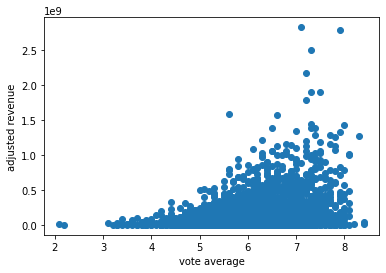

In [16]:
# Plot revenue vs vote score
plt.scatter(revenue['vote_average'], revenue['revenue_adj'])
plt.xlabel('vote average')
plt.ylabel('adjusted revenue');

Then , the scatter plots for the revenue vs popularity, and revenue vs budget will be followed.

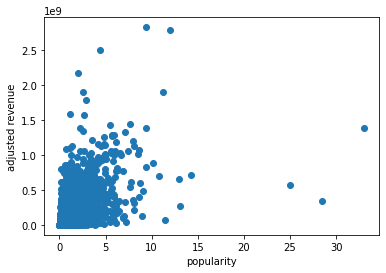

In [17]:
# Plot revenue vs popularity
plt.scatter(revenue['popularity'], revenue['revenue_adj'])
plt.xlabel('popularity')
plt.ylabel('adjusted revenue');

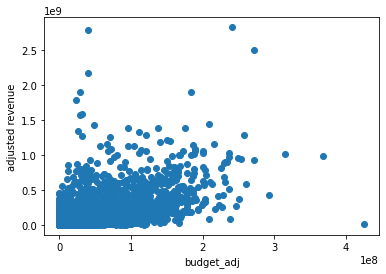

In [18]:
# Plot revenue vs budget
plt.scatter(revenue['budget_adj'], revenue['revenue_adj'])
plt.xlabel('budget_adj')
plt.ylabel('adjusted revenue');

While the budget and popularity don't seem to have strong relationships with revenues, vote scores look like having correlations with revenues. To do further analysis, vote scores are divided into four groups based on the quartile information, and each group's revenue is investigated.

In [19]:
# Check the quartile information of vote_average
revenue['vote_average'].describe()

count    4850.000000
mean        6.148763
std         0.798795
min         2.100000
25%         5.600000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [20]:
# Make the function to divide the groups
def divide_groups(column):
    bin_edges = [column.describe()[3]-0.1, column.describe()[4], column.describe()[5], column.describe()[6], column.describe()[7]]
    bin_names = ['very low', 'low', 'high', 'very high']
    return pd.cut(column, bin_edges, labels=bin_names)

In [21]:
# Dividing vote_average column into four groups
vote_score_level = divide_groups(revenue['vote_average'])
vote_score_level.value_counts()

low          1386
very low     1226
high         1136
very high    1102
Name: vote_average, dtype: int64

In [22]:
# Add vote_score_level column to the revenue_df dataframe
revenue['vote_score_level'] = vote_score_level
revenue.head()

D:\anaconda3\envs\DAND\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,original_title,budget_adj,popularity,revenue_adj,vote_average,vote_score_level
0,Jurassic World,1.379999e+08,32.985763,1.392446e+09,6.5,high
1,Mad Max: Fury Road,1.379999e+08,28.419936,3.481613e+08,7.1,very high
2,Insurgent,1.012000e+08,13.112507,2.716190e+08,6.3,high
3,Star Wars: The Force Awakens,1.839999e+08,11.173104,1.902723e+09,7.5,very high
4,Furious 7,1.747999e+08,9.335014,1.385749e+09,7.3,very high


In [23]:
# Check the mean adjusted revenue at each vote_score_level
revenue_vote_score = revenue.groupby('vote_score_level').mean().revenue_adj
revenue_vote_score

vote_score_level
very low     6.295745e+07
low          9.903548e+07
high         1.204132e+08
very high    1.877375e+08
Name: revenue_adj, dtype: float64

In [24]:
# Define the function for a bar chart
def bar_chart(indep_var_name, indep_var):
    locations = [1, 2, 3, 4]
    bin_names = ['very low', 'low', 'high', 'very high']
    plt.bar(locations, indep_var, tick_label=bin_names)
    plt.title('Average adjusted revenue by %s' %indep_var_name)
    plt.xlabel('%s' %indep_var_name)
    plt.ylabel('Average adjusted revenue');

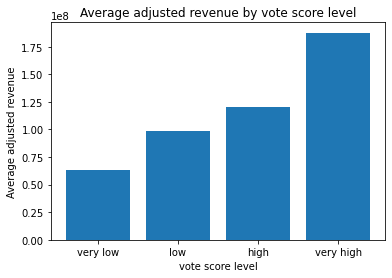

In [25]:
# Create a bar chart for the mean adjusted revenue with respect to vote_score level
bar_chart("vote score level", revenue_vote_score)

As shown above, the average revenues get higher with increasing level of the vote score.  
Popularity and budget are also investigated in the same way.

In [26]:
# Check the quartile information of popularity
revenue['popularity'].describe()

count    4850.000000
mean        1.045109
std         1.356628
min         0.001117
25%         0.387754
50%         0.680289
75%         1.210457
max        32.985763
Name: popularity, dtype: float64

In [27]:
# Dividing popularity column into four groups
popularity_level = divide_groups(revenue['popularity'])
popularity_level.value_counts()

very high    1213
very low     1213
high         1212
low          1212
Name: popularity, dtype: int64

In [28]:
# Add popularity column to the revenue dataframe
revenue['popularity_level'] = popularity_level
revenue.head()

D:\anaconda3\envs\DAND\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,original_title,budget_adj,popularity,revenue_adj,vote_average,vote_score_level,popularity_level
0,Jurassic World,1.379999e+08,32.985763,1.392446e+09,6.5,high,very high
1,Mad Max: Fury Road,1.379999e+08,28.419936,3.481613e+08,7.1,very high,very high
2,Insurgent,1.012000e+08,13.112507,2.716190e+08,6.3,high,very high
3,Star Wars: The Force Awakens,1.839999e+08,11.173104,1.902723e+09,7.5,very high,very high
4,Furious 7,1.747999e+08,9.335014,1.385749e+09,7.3,very high,very high


In [29]:
# Check the mean adjusted revenue at each popularity_level
revenue_popularity = revenue.groupby('popularity_level').mean().revenue_adj
revenue_popularity

popularity_level
very low     3.111374e+07
low          5.231752e+07
high         1.005261e+08
very high    2.762883e+08
Name: revenue_adj, dtype: float64

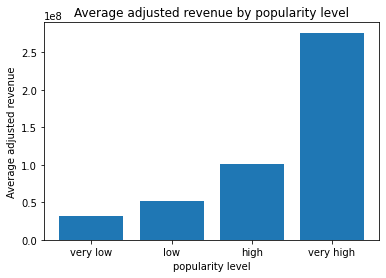

In [30]:
# Create a bar chart for the mean adjusted revenue with respect to popularity_level
bar_chart("popularity level", revenue_popularity)

As shown above, the average revenues get higher with increasing level of the popularity score.
Analysis on the budget is followed.

In [31]:
# Check the quartile information of the adjusted budget
revenue['budget_adj'].describe()

count    4.850000e+03
mean     3.516102e+07
std      4.375672e+07
min      0.000000e+00
25%      2.332078e+06
50%      2.032801e+07
75%      4.973516e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [32]:
# Check the number of movies that have budget = 0
len(revenue.query('budget_adj == 0'))

995

995 movies have the budget of 0, which does not make sense. These movies will be deleted on the list. Then, analysis will be performed only with 3855 data.

In [33]:
# Remove the 0 budget movies
drop_index = revenue[revenue['budget_adj'] == 0].index
revenue_budget = revenue.drop(drop_index)
revenue_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 4849
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   original_title    3855 non-null   object  
 1   budget_adj        3855 non-null   float64 
 2   popularity        3855 non-null   float64 
 3   revenue_adj       3855 non-null   float64 
 4   vote_average      3855 non-null   float64 
 5   vote_score_level  3855 non-null   category
 6   popularity_level  3855 non-null   category
dtypes: category(2), float64(4), object(1)
memory usage: 188.6+ KB


In [34]:
revenue_budget['budget_adj'].describe()

count    3.855000e+03
mean     4.423630e+07
std      4.480403e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001558e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [35]:
# Dividing budget_adj column into four groups
budget_level = divide_groups(revenue_budget['budget_adj'])
budget_level.value_counts()

very low     966
high         964
very high    963
low          962
Name: budget_adj, dtype: int64

In [36]:
# Add budget level column to the revenue_df_budget dataframe
revenue_budget['budget_level'] = budget_level
revenue_budget.head()

,original_title,budget_adj,popularity,revenue_adj,vote_average,vote_score_level,popularity_level,budget_level
0,Jurassic World,1.379999e+08,32.985763,1.392446e+09,6.5,high,very high,very high
1,Mad Max: Fury Road,1.379999e+08,28.419936,3.481613e+08,7.1,very high,very high,very high
2,Insurgent,1.012000e+08,13.112507,2.716190e+08,6.3,high,very high,very high
3,Star Wars: The Force Awakens,1.839999e+08,11.173104,1.902723e+09,7.5,very high,very high,very high
4,Furious 7,1.747999e+08,9.335014,1.385749e+09,7.3,very high,very high,very high


In [37]:
# Check the mean adjusted revenue at each budget_level
revenue_budget = revenue_budget.groupby('budget_level').mean().revenue_adj
revenue_budget

budget_level
very low     3.793248e+07
low          7.801312e+07
high         1.301363e+08
very high    3.022903e+08
Name: revenue_adj, dtype: float64

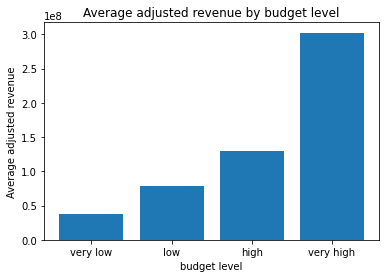

In [38]:
# Create a bar chart for the mean adjusted revenue with respect to budget_level
bar_chart('budget level', revenue_budget)

As shown above, the average revenues get higher with increasing level of the budget level.

<a id='conclusions'></a>
## Conclusions

In conclusion, two main questions below were investigated in this study.  
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?


For the first question, the most popular genres each year were presented based on the average popularity score.  
Refer to the table below for detailed information.

In [39]:
genres_most_popular

,genre,release_year
707,Horror,1960
636,Animation,1961
833,Thriller,1962
55,Adventure,1963
56,Adventure,1964
835,Thriller,1965
266,Drama,1966
637,Animation,1967
729,Mystery,1968
633,Action,1969


Generally, various genres were evenly chosen as the most popular ones over the 55 years. Interesting periods are 1988 - 1998 and 1999 - 2008 when animation and fantasy were mostly dominated genres, respectively.

For the second question, three independent variables (vote score, popularity score, adjusted budget) were investigated to find the relationships with the adjusted revenue of the movies.
Dividing the level of the independent variables into four groups followed by calculating mean adjusted revenue showed that there's a meaningful relationship between all three independent variables and revenue. As the independent variables increase, average adjusted revenue also increases.

Below is the bar plot for mean adjusted revenue vs vote score level.

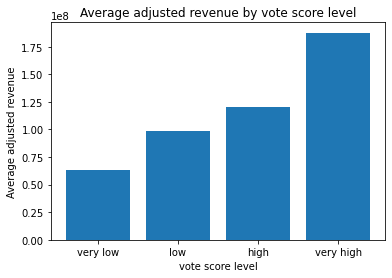

In [40]:
bar_chart("vote score level", revenue_vote_score)

Below is the bar plot for mean adjusted revenue vs popularity level.

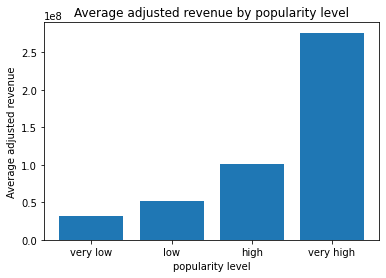

In [41]:
bar_chart("popularity level", revenue_popularity)

Finally, below is the bar plot for mean adjusted revenue vs budget level.

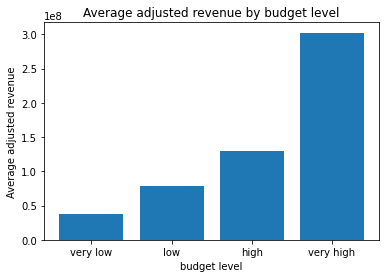

In [42]:
bar_chart('budget level', revenue_budget)

We should note that while the plots above show the correlation between three factors and revenues of the movies they do not mean they have a relationship with the causation.